<img src="https://thevalley.es/wp-content/uploads/2016/11/thevalley-logo-negro.png" width="400"></img>

<img src="https://www.cognodata.com/wp-content/uploads/2019/07/estadistica-descriptiva-e-inferencial.jpg" width="550"></img>

# Sesión estadística descriptiva básica

**Notebook elaborado por: Pablo Contreras**


# Carga de librerías

In [ ]:
# -----------------
# Import packages -
# -----------------
import numpy as np
from scipy.stats import kurtosis
import statistics # para la moda
import matplotlib.pyplot as plt # para gráficos
from scipy.stats import skew, norm # para simetría
import pandas as pd # para el manejo de dataframes
import seaborn as sns # para el gráfico de violín

# Medidas de posición o tendencia central

En el siguiente conjunto de datos se recogen los precios de oferta en venta de varios anuncios de determinado municipio de Madrid

In [ ]:
# Create a Dictionary of series
d = {'ADID':pd.Series([7845, 4085, 1098, 5284, 5743, 4389, 5287, 8293, 5225, 5555, 3578, 1389, 4273, 3594, 4987, 9678, 8765, 3456, 1243, 6734, 8907, 6785, 3498, 7845, 7956, 2376, 1238, 9854, 7655, 9875, 3588, 4567, 9086, 3468, 2365, 6745]),
   'TYPOLOGY':pd.Series(['piso', 'piso', 'piso', 'piso', 'piso', 'piso', 'piso', 'piso', 'piso', 'piso', 'piso', 'piso', 'piso', 'piso', 'piso', 'piso', 'piso', 'piso', 'piso', 'piso', 'piso', 'piso', 'piso', 'piso', 'piso', 'piso', 'piso', 'piso', 'piso', 'piso', 'piso', 'piso', 'piso', 'piso', 'piso', 'piso']),
   'PRICE':pd.Series([185000, 190000, 200000, 200000, 216000, 240000, 260000, 215000, 219000, 240000, 225000, 250000, 270000, 230000, 217000, 218000, 170000, 190000, 200000, 210000, 180000, 250000, 240000, 199000, 210000, 215000, 243000, 240000, 210000, 150000, 270000, 280000, 220000, 170000, 165000, 250000])
}

# Create a DataFrame
df_pisos = pd.DataFrame(d)
print(df_pisos)

    ADID TYPOLOGY   PRICE
0   7845     piso  185000
1   4085     piso  190000
2   1098     piso  200000
3   5284     piso  200000
4   5743     piso  216000
5   4389     piso  240000
6   5287     piso  260000
7   8293     piso  215000
8   5225     piso  219000
9   5555     piso  240000
10  3578     piso  225000
11  1389     piso  250000
12  4273     piso  270000
13  3594     piso  230000
14  4987     piso  217000
15  9678     piso  218000
16  8765     piso  170000
17  3456     piso  190000
18  1243     piso  200000
19  6734     piso  210000
20  8907     piso  180000
21  6785     piso  250000
22  3498     piso  240000
23  7845     piso  199000
24  7956     piso  210000
25  2376     piso  215000
26  1238     piso  243000
27  9854     piso  240000
28  7655     piso  210000
29  9875     piso  150000
30  3588     piso  270000
31  4567     piso  280000
32  9086     piso  220000
33  3468     piso  170000
34  2365     piso  165000
35  6745     piso  250000


## Media aritmética

Calcular el precio medio de venta


In [ ]:
df_pisos.PRICE.mean()

217694.44444444444

In [ ]:
media = sum(df_pisos.PRICE)/len(df_pisos.PRICE)
media

217694.44444444444

La media se ve muy alterada por valores extremos

In [ ]:
W = np.append(df_pisos.PRICE, 5000000) # Amancio Ortega se construye un palacio en el municipio de 5M€
W.mean()

346945.9459459459

## Media ponderada

**Ejemplo 1**. Para conocer la nota en una asignatura, el alumno será evaluado en un examen que valdrá el 70% de la nota, unas prácticas que contarán el 20% y participación en clase que contará un 10%. Si sus notas han sido 4, 8, 7 respectivamente, ¿ha aprobado el alumno?

In [ ]:
X = np.array([4, 8, 7])
np.average(X, weights=[0.7, 0.2, 0.1])

5.100000000000001

¿A quien no le ha pasado que las prácticas le han acabado salvando? 🙂



---




**Ejemplo 2**. Supongamos que en nuestro municipio se construyen 10 chalets. Sabemos que el precio medio de venta de los pisos es 217694.44€. Y el de los chalets de 332500€ ¿Cual es el precio medio de venta de la zona?

In [ ]:
X = 217694.44 # pisos
Y = 332500 # chalet

Si hiciesemos directamente la media de los precios sería erroneo porque estaríamos dando el mismo peso al precio de los chalets que al precio de los pisos cuando sabemos que hay más pisos que chalets en la localidad. El precio medio resultante no sería representativo.

In [ ]:
Z = np.append(X, Y)
Z.mean() # no representativo

275097.22

El precio medio de venta representativo de la localidad sería el resultado de hacer la media ponderada. En este caso el peso de los pisos sería 35/45 = 0.77 y el de los chalets  10/45 = 0.23. Vemos como el precio medio se acerca más a los precios de venta de los pisos que al de los chalets.

In [ ]:
np.average(Z, weights=[0.77, 0.23])

244099.7188

¡Ojo! Si dispusiesemos de los precios de venta de cada uno de los 10 chalets, para calcular el precio medio bastaría con hacer la media aritmética

In [ ]:
df_chalets = pd.DataFrame({"ADID":[2059, 3466, 2352, 9823, 3647, 1382, 9999, 4239, 3593, 1798],
                    "TYPOLOGY":['chalet', 'chalet', 'chalet', 'chalet', 'chalet', 'chalet', 'chalet', 'chalet', 'chalet', 'chalet'],
                    "PRICE":[320000, 310000, 350000, 330000, 340000, 350000, 320000, 325000, 330000, 350000]})

df_pisos_n_chalets = df_pisos.append(df_chalets)
print(df_pisos_n_chalets)

    ADID TYPOLOGY   PRICE
0   7845     piso  185000
1   4085     piso  190000
2   1098     piso  200000
3   5284     piso  200000
4   5743     piso  216000
5   4389     piso  240000
6   5287     piso  260000
7   8293     piso  215000
8   5225     piso  219000
9   5555     piso  240000
10  3578     piso  225000
11  1389     piso  250000
12  4273     piso  270000
13  3594     piso  230000
14  4987     piso  217000
15  9678     piso  218000
16  8765     piso  170000
17  3456     piso  190000
18  1243     piso  200000
19  6734     piso  210000
20  8907     piso  180000
21  6785     piso  250000
22  3498     piso  240000
23  7845     piso  199000
24  7956     piso  210000
25  2376     piso  215000
26  1238     piso  243000
27  9854     piso  240000
28  7655     piso  210000
29  9875     piso  150000
30  3588     piso  270000
31  4567     piso  280000
32  9086     piso  220000
33  3468     piso  170000
34  2365     piso  165000
35  6745     piso  250000
0   2059   chalet  320000
1   3466   c

<ipython-input-10-5eea359a7604>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_pisos_n_chalets = df_pisos.append(df_chalets)


In [ ]:
df_pisos_n_chalets.PRICE.mean() # La pequeña diferencia respecto al valor de la media ponderada es debido a redondeo por decimales

242652.1739130435

## Mediana

Calcular el precio mediano de los pisos del municipio

In [ ]:
df_pisos.PRICE.median()

216500.0

## Comparativa mediana vs media aritmética

Vamos a demostrar como la mediana es más robusta frente a valores extremos que la media. ¿Recuerdas como el palacete de Amancio Ortega distorsionaba el precio medio de los pisos?

In [ ]:
W = np.append(df_pisos.PRICE, 5000000) # Amancio Ortega se construye un palacio en el municipio de 5M€
W.mean() # (El precio medio de los pisos sin Amancio era de 217694.44)

346945.9459459459

La media se dispara mientras que la mediana se mantiene más estable

In [ ]:
print(W.mean(), np.median(W))

346945.9459459459 217000.0


## Moda

Calcular el precio modal de los pisos del municipio

In [ ]:
df_pisos.PRICE.mode()

0    240000
Name: PRICE, dtype: int64

## Cuantiles

Calcular el percentil de orden 23, el segundo decil y el primer cuartil de los precios de los pisos

In [ ]:
print("Percentil 23: ", df_pisos.PRICE.quantile(.23))
print("Segundo decil: ", df_pisos.PRICE.quantile(.2))
print("Primer cuartil: ", df_pisos.PRICE.quantile(.25))

Percentil 23:  199050.0
Segundo decil:  190000.0
Primer cuartil:  199750.0


In [ ]:
df_quantile = pd.DataFrame({"EXAMPLE":[10,20,20,30,40]})
print("Percentil 23: ", df_quantile.EXAMPLE.quantile(.23))

Percentil 23:  19.2


# Medidas de dispersión

## Varianza y desviación típica

Uso de la varianza para determinar la representatividad de la media aritmética. Sean X e Y dos variables con igual media

In [ ]:
X = np.array([45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55])
Y = np.array([0, 25, 50, 75, 100])

print("Media de X: ", X.mean())
print("Media de Y: ", Y.mean())
print("Varianza de X: ", X.var())
print("Varianza de Y: ", Y.var())
print("Desviación típica de X: ", X.std())
print("Desviación típica de Y: ", Y.std())

Media de X:  50.0
Media de Y:  50.0
Varianza de X:  10.0
Varianza de Y:  1250.0
Desviación típica de X:  3.1622776601683795
Desviación típica de Y:  35.35533905932738


* Como vemos, las medias aritméticas de las variables coinciden, pero la representatividad de la media es más alta en el caso de la variable X, porque los valores están más próximos entre sí (desv típica más baja) que en el caso de la variable Y.

* Si por ejemplo X estuviese midiendo la edad de ciertas personas, la interpretación de su desviación típica sería la siguiente: de media, la diferencia entre las edades de las personas que conforman la muestra es de 3.16 años

* Si comparamos el valor de la desv tipica de X con la media de X vemos que la desv tipica es un valor mucho menor que el valor de la media de X por lo que podemos afirmar que la variabilidad de X es baja







---



## Rango y rango intercuartílico

In [ ]:
df_pisos.PRICE.describe()

count        36.000000
mean     217694.444444
std       31411.389604
min      150000.000000
25%      199750.000000
50%      216500.000000
75%      240000.000000
max      280000.000000
Name: PRICE, dtype: float64

In [ ]:
print("El rango de PRICE: ", 280000 - 150000)
print("El IQR de PRICE: ", 240000 - 199750)

El rango de PRICE:  130000
El IQR de PRICE:  40250


A mayor rango o IQR, mayor dispersión de los datos

Al igual que con la media y mediana, cuando la distribución de la variable es muy heterogenea o hay valores atípicos, el IQR es más representativo que el rango

In [ ]:
Q3, Q1 = np.percentile(df_pisos.PRICE, [75 ,25])
print(Q1, Q3)
IQR = Q3 - Q1
print("El IQR de W: ", IQR)
print("El rango de W: ", df_pisos.PRICE.max() - df_pisos.PRICE.min())

199750.0 240000.0
El IQR de W:  40250.0
El rango de W:  130000


In [ ]:
W = np.append(df_pisos.PRICE, 5000000) # Amancio Ortega se construye un palacio en el municipio de 5M€
Q3, Q1 = np.percentile(W, [75 ,25])
print(Q1, Q3)
IQR = Q3 - Q1
print("El IQR de W: ", IQR)
print("El rango de W: ", W.max() - W.min())

200000.0 240000.0
El IQR de W:  40000.0
El rango de W:  4850000


## Coeficiente de variación de Pearson

Pensemos en una población de elefantes y otra de ratones. La población de elefantes tiene un peso medio de 5.000 kilogramos y una desviación típica de 400 kilogramos. La población de ratones tiene un peso medio de 15 gramos y una desviación típica de 5 gramos. Si comparáramos la dispersión de ambas poblaciones mediante la desviación típica podríamos pensar que hay mayor dispersión para la población de elefantes que para la de los ratones.

Sin embargo al calcular el coeficiente de variación para ambas poblaciones, nos daríamos cuenta que es justo al contrario.

In [ ]:
print("Coeficiente de variación de elefantes: ", 400/5000)
print("Coeficiente de variación de ratones: ", 5/15)

Coeficiente de variación de elefantes:  0.08
Coeficiente de variación de ratones:  0.3333333333333333


Vemos que la población con mayor dispersión, no es la que tiene una mayor desviación típica. En general, se suele convenir en que valores de
menores a 0.1 indican una
alta concentración, entre 0.1 y 0.5 una concentración media, y valores superiores a
0.5 una alta dispersión y una media poco o nada representativa.

# Medidas de forma

## Simetría

Sea X una variable que mide en kg el peso de una muestra de personas mayores de 18 años

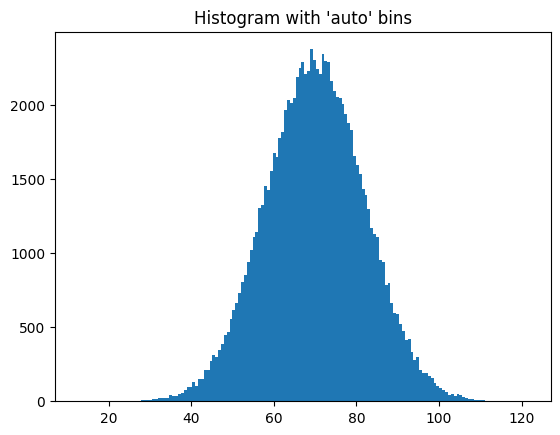

El coeficiente de simetria es -0.002311093889486616


In [ ]:
mu, sigma = 70, 12 # media y desv tipica
X = np.random.normal(mu, sigma, 100000)

plt.hist(X, bins='auto')
plt.title("Histogram with 'auto' bins")
plt.show()

print('El coeficiente de simetria es', skew(X))

Dado que la variable X ha sido generada aleatoriamente, el coeficiente de simetría no es cero, pero se acerca mucho

Si ahora filtramos la variable X y nos quedamos con los individuos con más de 90kg, ¿qué pasa?

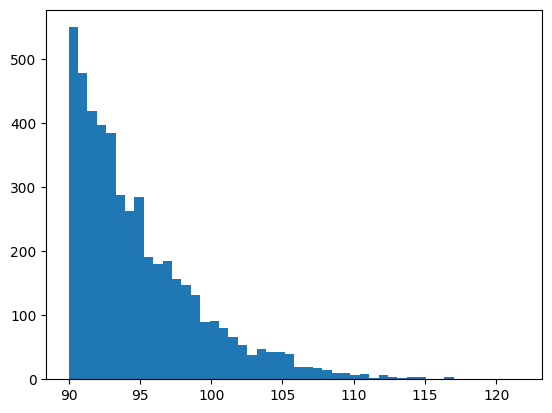

El coeficiente de simetria es 1.462867510468074


In [ ]:
Y = X[X > 90]
plt.hist(Y, bins='auto')
plt.show()

print('El coeficiente de simetria es', skew(Y))

Obtenemos un coeficiente de simetría positivo lo que indica una clara asimetría positiva

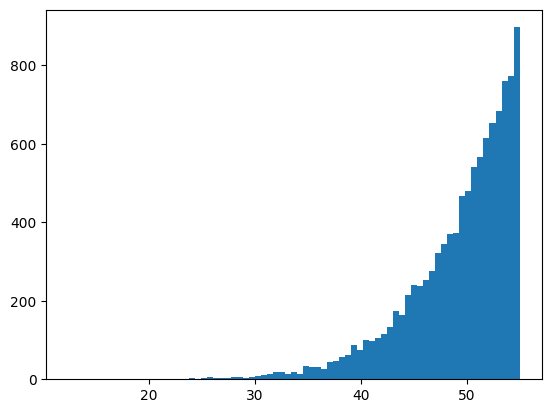

El coeficiente de simetria es -1.4041926371744362


In [ ]:
Z = X[X < 55]
plt.hist(Z, bins='auto')
plt.show()

print('El coeficiente de simetria es', skew(Z))

Por el contrario, si filtramos los pesos menores a 55kg, obtenemos un coeficiente negativo lo que indica asimetría negativa

## Curtosis

Dada la variable X, calcular la curtosis

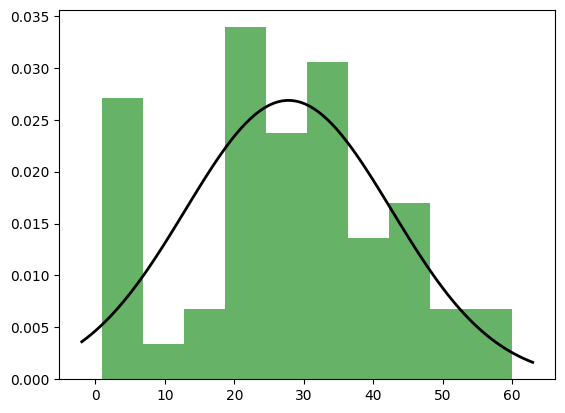

In [ ]:
X = np.array([14, 19, 20, 22, 24, 26, 23, 50, 60, 55, 45, 23, 12, 54, 35, 27,
              24, 19, 45, 34, 36, 32, 45, 15, 19, 30, 30, 31, 36, 38, 44, 47,
              23, 34, 32, 31, 29, 27, 25, 5, 6, 1, 2, 3, 4, 5, 6, 40, 41, 42])

plt.hist(X, bins=10, density=True, alpha=0.6, color='g')

mu, sigma = X.mean(), X.std() # Calculamos media y std de X
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100) # Genera 100 valores entre min(X) y max(X)
p = norm.pdf(x, mu, sigma) # Para cada valor le asigna su densidad
plt.plot(x, p, 'k', linewidth=2)

plt.show()

En el gráfico lo que se está comparando es la distribucion de la variable X con respecto a la distribución de la variable Y que es una distribución normal con media de X y std de X. A la vista del gráfico está claro que no se puede considerar que X sea normal. No obstante, vamos a calcular el coeficiente de curtosis o segundo coeficiente de Fisher para corroborarlo

In [ ]:
kurtosis(X) # platicurtica

-0.6475711424130508

Veamos ahora que pasa con nuestros pisos. A la vista del histograma sí parece que siga una distribución normal

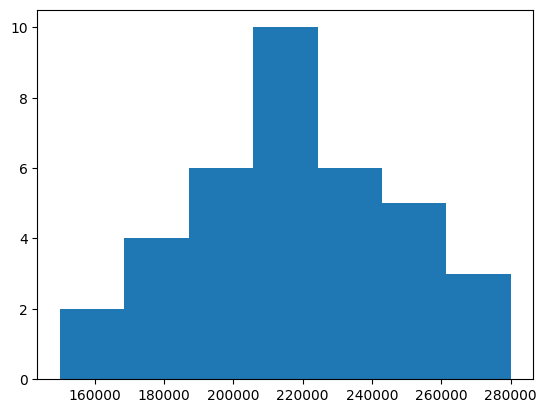

In [ ]:
plt.hist(df_pisos.PRICE, bins='auto')
plt.show()

Vamos a pintar por encima la función de densidad de una distribución normal con la media de los precios y la desv típica de los precios

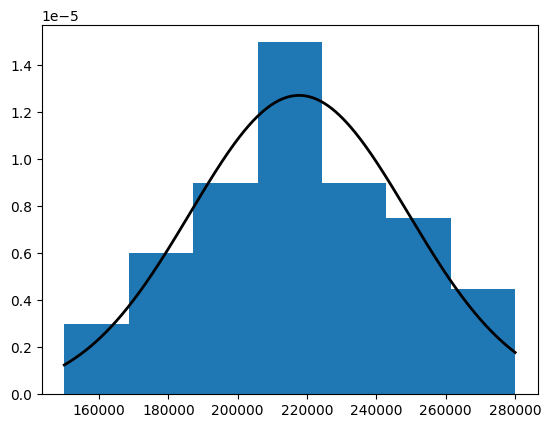

In [ ]:
plt.hist(df_pisos.PRICE, bins='auto', density=True)

mu, sigma = df_pisos.PRICE.mean(), df_pisos.PRICE.std() # Calculamos media y std de X
Y = np.random.normal(mu, sigma, 100000) # Generamos una variable con distribución normal con la media y std de los precios
xmin, xmax = df_pisos.PRICE.min(), df_pisos.PRICE.max()
x = np.linspace(xmin, xmax, 100000)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)

plt.show()

In [ ]:
kurtosis(df_pisos.PRICE)

-0.5319128506594595

La curtosis dice que la distribución es platicurtica y por tanto no podría decirse que sigue una distribución normal, pero habría que confirmarlo con otros test estadísticos (Shapiro-Wilk)

# Visualización de datos

Los gráficos son también una importante herramienta de la estadística descriptiva

## Gráficos de barras (bar chart)

Muestran rectangulos paralelos llamados barras. Cada barra se corresponde a un único valor y tiene una altura proporcional a la frecuencia absoluta o relativa del valor en la distribución

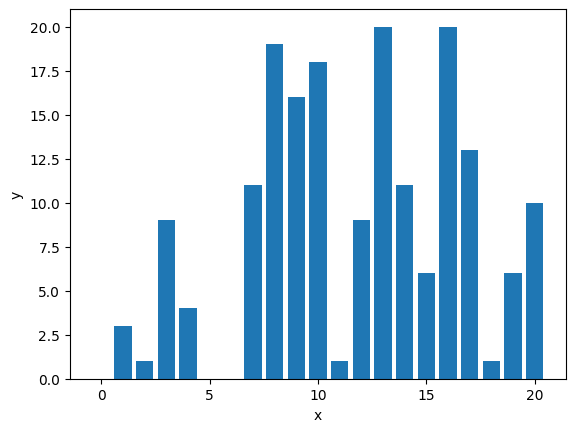

In [ ]:
x = np.arange(21) # Array 1, 2, 3, 4, 5  ... 21 para el eje X
y = np.random.randint(21, size=21) # Variable aleatoria de numeros enteros
fig, ax = plt.subplots()
ax.bar(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

## Histograma

Útil sobre todo en variables continuas con muchos valores diferentes donde usar un gráfico de barras no sería práctico. A diferencia del gráfico de barras donde cada barra representaba un único valor, en un histograma un barra representa un intervalo de valores

[  9  20  70 146 217 239 160  86  38  15]
[-3.04614305 -2.46559324 -1.88504342 -1.3044936  -0.72394379 -0.14339397
  0.43715585  1.01770566  1.59825548  2.1788053   2.75935511]


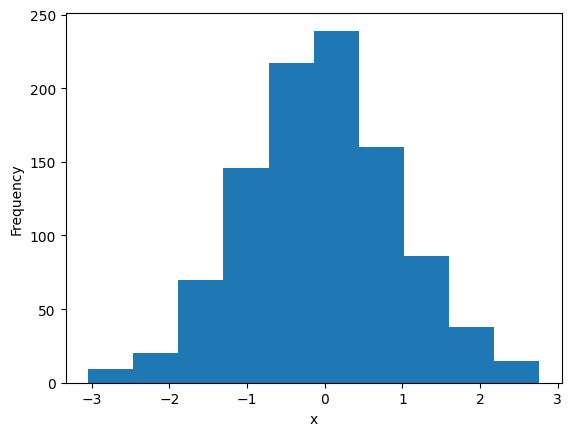

In [ ]:
np.random.seed(seed=0) # Fijar la semilla para obtener los mismos resultados siempre
x = np.random.randn(1000)

hist, bin_edges = np.histogram(x, bins = 15)
print(hist) # número de valores en cada 'bin'
print(bin_edges) # contiene los límites de los intervalos

fig, ax = plt.subplots()
ax.hist(x, bin_edges, cumulative=False)
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
plt.show()

Todos los pasos anteriores se resumen en la función **hist()** que también muestras las frecuencias y los límites de los intervalos

(array([  9.,  20.,  70., 146., 217., 239., 160.,  86.,  38.,  15.]),
 array([-3.04614305, -2.46559324, -1.88504342, -1.3044936 , -0.72394379,
        -0.14339397,  0.43715585,  1.01770566,  1.59825548,  2.1788053 ,
         2.75935511]),
 <BarContainer object of 10 artists>)

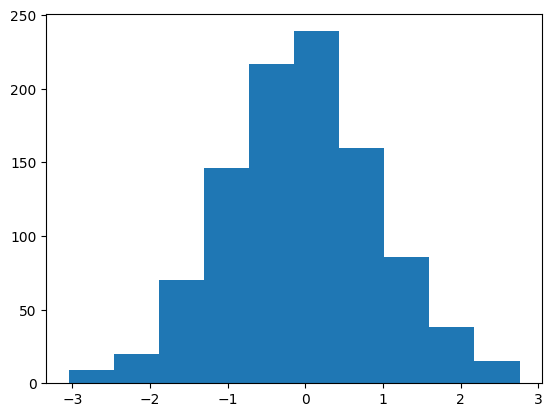

In [ ]:
plt.hist(x)

## Nube de puntos (scatter plot)

Permite representar dos variables a la vez y estudiar su relación

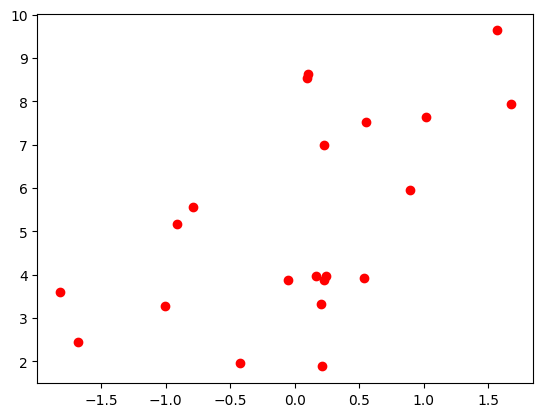

In [ ]:
x = np.random.randn(21)
y = 5 + 2 * x + 2 * np.random.randn(21)

plt.plot(x, y, 'ro') # Más info acerca del tercer parámetro https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

## Gráfico de cajas y bigotes (box plot)

Gráfico muy completo que muestra las medidas de estadística descriptiva de forma vistual.

Esto son los parámetros disponibles:
- x, y, z son tus datos
- **vert**: indica la orientación, por defecto (True) es en vertical
- **showmeans**: representa la media
- **meanline**: representa la media como una linea, en vez de un punto
- **labels**: el nombre de tus arrays
- **medianprops**: propiedades de la linea que representa la mediana
- **meanprops**: propiedad de la linea que representa la media

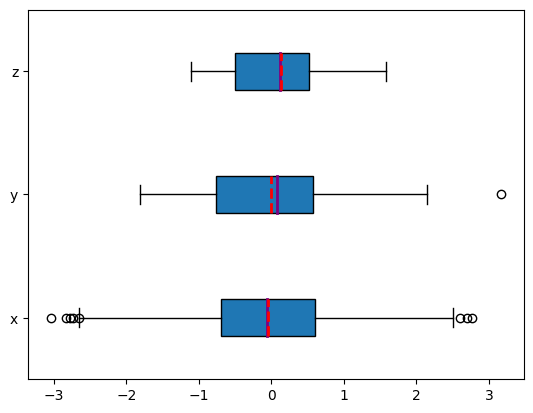

In [ ]:
np.random.seed(seed=0) # Fijar la semilla para obtener los mismos resultados siempre
x = np.random.randn(1000)
y = np.random.randn(100)
z = np.random.randn(10)

fig, ax = plt.subplots()
ax.boxplot((x, y, z), vert=False, showmeans=True, meanline=True,
           labels=('x', 'y', 'z'), patch_artist=True,
           medianprops={'linewidth': 2, 'color': 'purple'},
           meanprops={'linewidth': 2, 'color': 'red'})
plt.show()

## Gráfico de violín

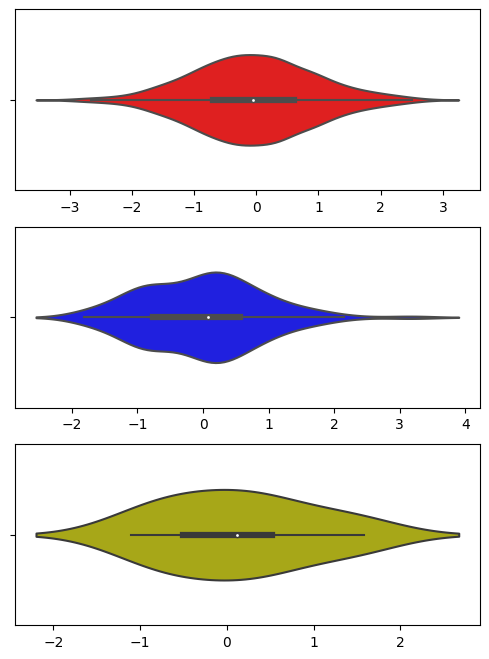

In [ ]:
np.random.seed(seed=0) # Fijar la semilla para obtener los mismos resultados siempre
x = np.random.randn(1000)
y = np.random.randn(100)
z = np.random.randn(10)

fig, ax = plt.subplots(3, 1, figsize=(6, 8))

sns.violinplot(x=x, color="r", width=0.5, ax=ax[0])
sns.violinplot(x=y, color="b", width=0.5, ax=ax[1])
sns.violinplot(x=z, color="y", width=0.5, ax=ax[2])

plt.show()

# Covarianza. Correlación lineal

Sea X una variable que indica el consumo de latas de cerveza al día e Y la tasa de muertes por cirrosis. ¿Existe relación lineal?

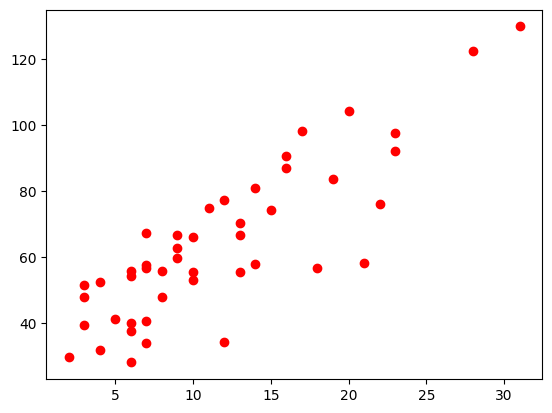

In [ ]:
X = np.array([5, 4, 3, 7, 11, 9, 6, 3, 12, 7, 14, 12, 10, 10, 14, 9, 7, 18, 6,
              31, 13, 20, 19, 10, 4, 16, 9, 6, 6, 21, 15, 17, 7, 13, 8, 28, 23,
              22, 23, 7, 16, 2, 6, 3, 8, 13])
Y = np.array([41.2, 31.7, 39.4, 57.5, 74.8, 59.8, 54.3, 47.9, 77.2, 56.6, 80.9,
              34.3, 53.1, 55.4, 57.8, 62.8, 67.3, 56.7, 37.6, 129.9, 70.3, 104.2,
              83.6, 66, 52.3, 86.9, 66.6, 40.1, 55.7, 58.1, 74.3, 98.1, 40.7,
              66.7, 48, 122.5, 92.1, 76, 97.5, 33.8, 90.5, 29.7, 28, 51.6, 55.7,
              55.5])
plt.plot(X,Y,'ro')

De la simple observación de la nube de puntos podemos deducir que existe una relación lineal positiva entre las dos variables; esto es, si crece el consumo de alcohol, crece el porcentaje de fallecimientos. Si calculamos la covarianza:

In [ ]:
np.cov(X, Y)[0][1] # matriz de covarianzas, nos importa la diagonal

137.05502415458935

In [ ]:
np.cov(X, Y)

array([[ 47.89227053, 137.05502415],
       [137.05502415, 549.8077343 ]])

Nos da un número positivo que confirma la relación lineal positiva. Sin embargo, el número tiene díficil interpretación ¿como de fuerte es la relación? Es por ello que, en vez de trabajar con la covarianza, se trabaja con el coeficiente de correlación de Pearson.

In [ ]:
np.corrcoef(X, Y)[0][1]

0.8446111774903117

Vemos como el coeficiente de correlación de Pearson está muy próximo a 1 lo que nos indica una fuerte relación lineal positiva.



---



Ahora vamos a demostrar como el hecho de que dos variables estén incorreladas **linealmente** no implica que sean independientes. Es decir, que no exista relación **lineal** no implica que sean independientes

In [ ]:
X = np.array([5, 4, 3, 2, 1, 0, -1, -2, -3, -4, -5])
Y = np.array([29, 20, 13, 8, 5, 4, 5, 8, 13, 20, 29])

np.corrcoef(X, Y)[0][1]

0.0

El coeficiente de correlación de Pearson nos dice que no existe relación lineal entre X e Y, pero representemos gráficamente ambas variables:

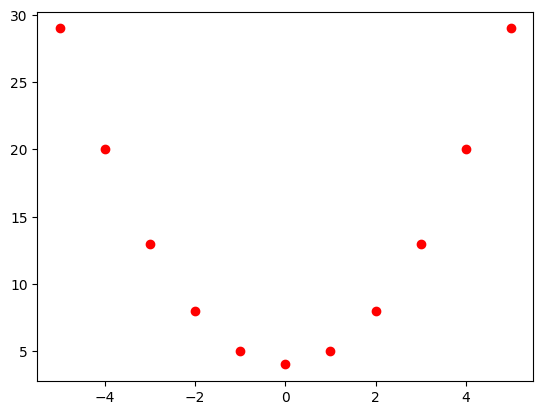

In [ ]:
plt.plot(X, Y, 'ro')

A la vista del gráfico se puede deducir que sí que existe algun tipo de relación. Concretamente, Y = X² + 4. Esto quiere decir que existe una relación entre X e Y (si sabemos el valor de X, obtenemos directamente el de Y), pero esta relación no es de tipo lineal. En este tema solo estudiaremos la posible relación lineal entre dos variables.

# Tipificación

Tipificar o normalizar la variable X

In [ ]:
X = np.array([5, 4, 3, 7, 11, 9, 6, 3, 12, 7, 14, 12, 10, 10, 14, 9, 7, 18, 6,
              31, 13, 20, 19, 10, 4, 16, 9, 6, 6, 21, 15, 17, 7, 13, 8, 28, 23,
              22, 23, 7, 16, 2, 6, 3, 8, 13])
print('La media de X es:', X.mean())
print('La desviación típica de X es:', X.std())

Z = (X - X.mean())/X.std()
print('La media de Z (tipificada de X) es:', round(Z.mean()))
print('La desviación típica de Z (tipificada de X) es:', round(Z.std()))

La media de X es: 11.58695652173913
La desviación típica de X es: 6.844788836443455
La media de Z (tipificada de X) es: 0
La desviación típica de Z (tipificada de X) es: 1


Se comprueba que la media de Z es 0 y su desv típica 1


---


Pepe trabaja en un supermercado y gana 1000€ al mes. En su categoria laboral, el salario sigue una distribución normal con media 800€ y desviación típica 25€. Por otro lado, Manolo es data scientist y gana 2100€. Si el salario medio de los data scientists sigue una distribución normal con media 2000€ al mes y desviación típica 100€, tanto uno como otro ganan por encima de la media. Si se quiere conocer cuál de los dos ocupa mejor posición relativa dentro de su categoría, hay que tipificar los sueldos:

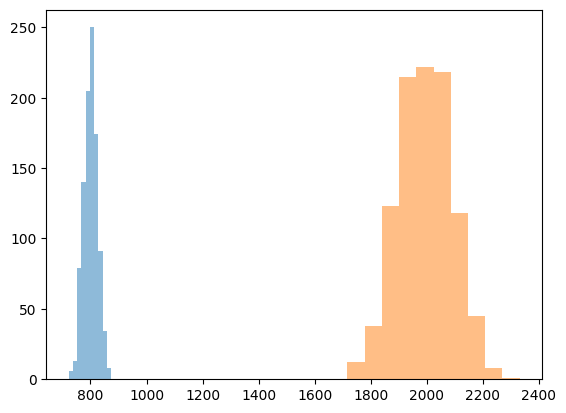

In [ ]:
pepe = np.random.normal(800, 25, size=1000) # Generamos valores distribución supermercado
manolo = np.random.normal(2000, 100, size=1000) # Generamos valores distribución DS

plt.hist(pepe, alpha=0.5, label='Pepe')
plt.hist(manolo, alpha=0.5, label='Manolo')

plt.show()

0.02180249368119505
0.9784981514894973
-0.07147481449944991
0.9559943129067004


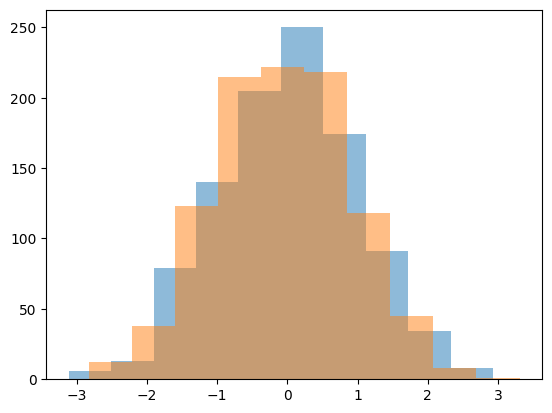

In [ ]:
pepe_tipificado = (pepe - 800)/25
manolo_tipificado = (manolo - 2000)/100

print(np.mean(pepe_tipificado)) # Media 0
print(np.std(pepe_tipificado)) # Desv típica 1

print(np.mean(manolo_tipificado)) # Media 0
print(np.std(manolo_tipificado)) # Desv típica 1

plt.hist(pepe_tipificado, alpha=0.5, label='Pepe')
plt.hist(manolo_tipificado, alpha=0.5, label='Manolo')

plt.show()

In [ ]:
P = (1000-800)/25
M = (2100-2000)/100
print('Pepe tipificado:', P)
print('Manolo tipificado:', M)

Pepe tipificado: 8.0
Manolo tipificado: 1.0


En términos absolutos Manolo gana más que Pepe. Sin embargo, en relación al conjunto de empleados de su gremio, Pepe ocupa mejor posición.

Desde un punto de vista geométrico, la media y la desviación típica de una variable pueden considerarse como el centro de gravedad de la distribución y su escala. Al tipificar distintas variables, las centramos en el mismo punto y las dotamos de la misma escala. Además, los valores tipificados se convierten en datos adimensionales. Por todo lo anterior, la tipificación tiene la propiedad de hacer comparables valores individuales que pertenecen a distinas distribuciones, aún en el caso de que éstas vinieran expresadas en diferentes unidades.

# Ejercicios

## Práctica individual 1

En la siguienta tabla se han recogido las edades que tenían los
actores y actrices que ganaron el Oscar a la mejor interpretación, en todos los
años de existencia de dichos premios (1929-2013). En la tabla aparece, por
orden cronólogico, la edad que tenía la actriz (actor) que ganó el Oscar en la
primera celebración de los premios, y sucesivamente hasta 2013. Realizar un análisis exploratorio para ver si existen diferencias entre las edades de actores y actrices ganadores del premio

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
X = np.array([22, 37, 28, 63, 32, 26, 31, 27, 27, 28, 30, 26, 29, 24, 38, 25, 29, 41, 30, 35, 35, 33,
29, 38, 54, 24, 25, 46, 41, 28, 40, 39, 29, 27, 31, 38, 29, 25, 35, 60, 43, 35, 34, 34, 27, 37,
42, 41, 36, 32, 41, 33, 31, 74, 33, 50, 38, 61, 21, 41, 26, 80, 42, 29, 33, 35, 45, 49, 39, 34, 26,
25, 33, 35, 35, 28, 30, 29, 61, 32, 33, 45, 28, 62, 22]) # Actrices

Y = np.array([44, 41, 62, 52, 41, 34, 34, 52, 41, 37, 38, 34, 32, 40, 43, 56, 41, 39, 49, 57, 41,
38, 42, 52, 51, 35, 30, 39, 41, 44, 49, 35, 47, 31, 47, 37, 57, 42, 45, 42, 44, 62, 43, 42, 48,
49, 56, 38, 60, 30, 40, 42, 36, 76, 39, 53, 45, 36, 62, 43, 51, 32, 42, 54, 52, 37, 38, 32, 45,
60, 46, 40, 36, 47, 29, 43, 37, 38, 45, 50, 48, 60, 50, 39, 55]) # Actores

In [ ]:
fig, ax = plt.subplots()
ax.boxplot((X, Y), vert=False, showmeans=True, meanline=True,
          labels=('Actrices', 'Actores'), patch_artist=True,
          medianprops={'linewidth': 2, 'color': 'purple'},
          meanprops={'linewidth': 2, 'color': 'red'})
plt.show()

In [ ]:
#fig, ax = plt.subplots(2, 1)

#sns.violinplot(x=X, color="b", width=0.5, ax=ax[0], label='Actores')
#sns.violinplot(x=Y, color="y", width=0.5, ax=ax[1])

sns.violinplot(data=[X,Y], orient='h')

plt.show()

## Más ejercicios

http://www.uco.es/zootecniaygestion/img/pictorex/27_12_49_7.pdf